<a href="https://colab.research.google.com/github/MageshTK/Intern-IQ/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE DEPENDENCIES


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOAD THE DATASET

In [ ]:
house_price_data = pd.read_csv('/content/housing[1].csv')

In [ ]:
print(house_price_data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [ ]:
house_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
house_price_data.dropna(inplace=True)

In [ ]:
house_price_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
from sklearn.model_selection import train_test_split

X = house_price_data.drop(['median_house_value'], axis=1)
Y = house_price_data['median_house_value']

In [ ]:
print(Y)

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
train_data = X_train.join(Y_train)

In [ ]:
print(train_data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20455    -118.77     34.27                 7.0       3074.0           794.0   
16934    -122.32     37.56                 9.0       1150.0           287.0   
19883    -119.19     36.34                33.0       2199.0           403.0   
214      -122.22     37.79                49.0       1826.0           450.0   
4421     -118.26     34.07                52.0        830.0           200.0   
...          ...       ...                 ...          ...             ...   
17106    -122.20     37.46                40.0       1723.0           208.0   
15265    -117.28     33.04                12.0       4459.0           928.0   
14633    -117.20     32.79                16.0       2079.0           394.0   
16732    -120.65     35.41                15.0       6725.0          1111.0   
8414     -118.35     33.94                42.0       1028.0           278.0   

       population  households  median_income ocean_

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

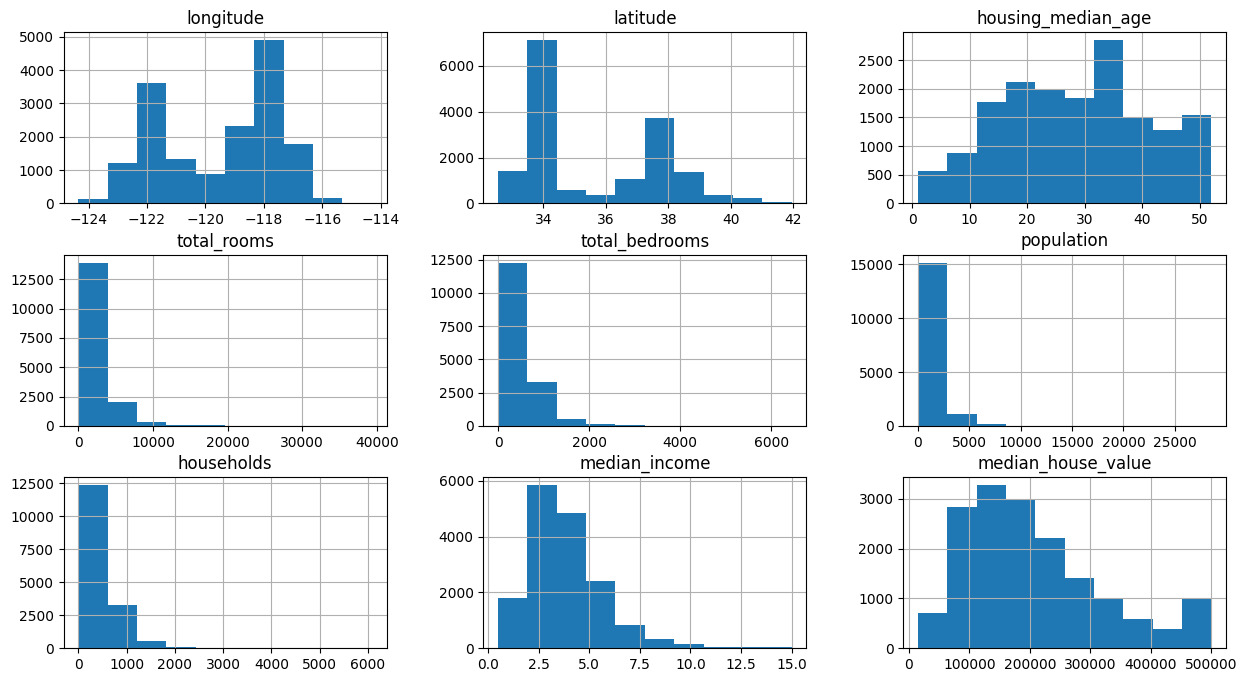

In [ ]:
train_data.hist(figsize=(15, 8))

<ipython-input-22-9ab4983852c1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

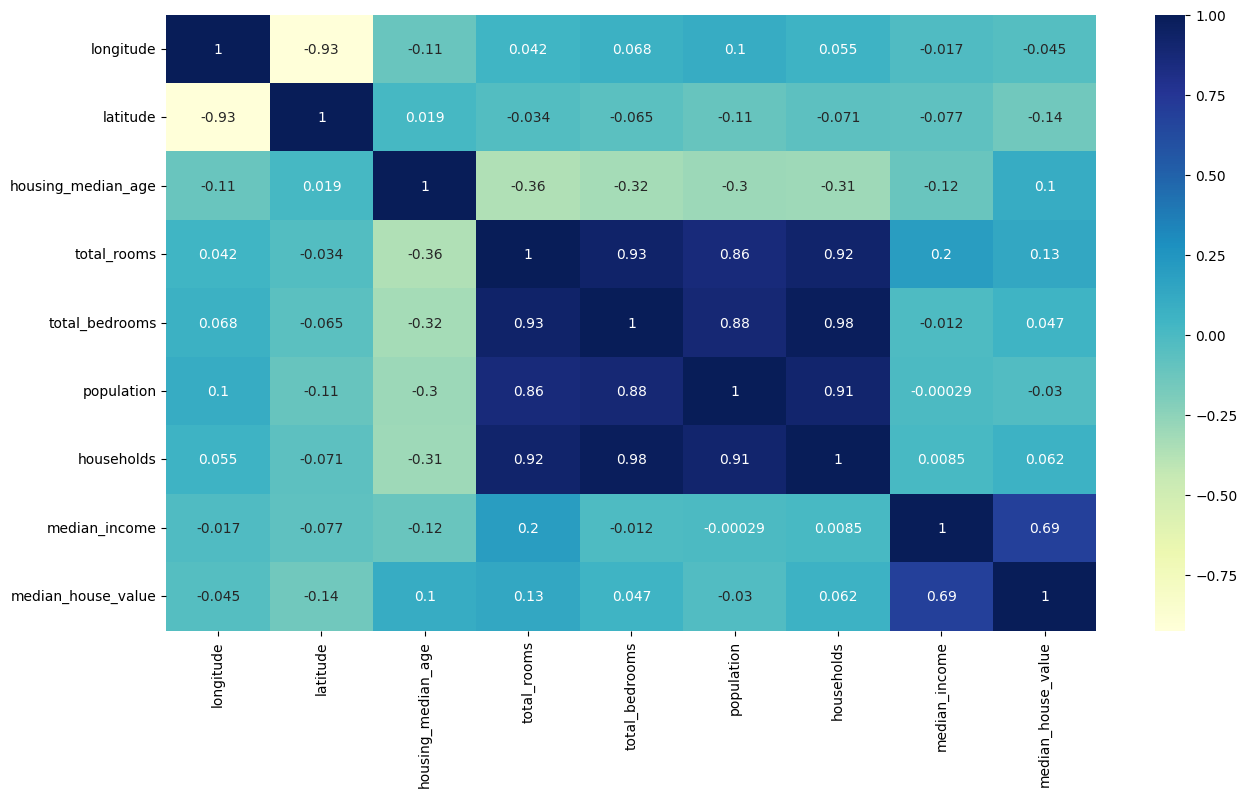

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

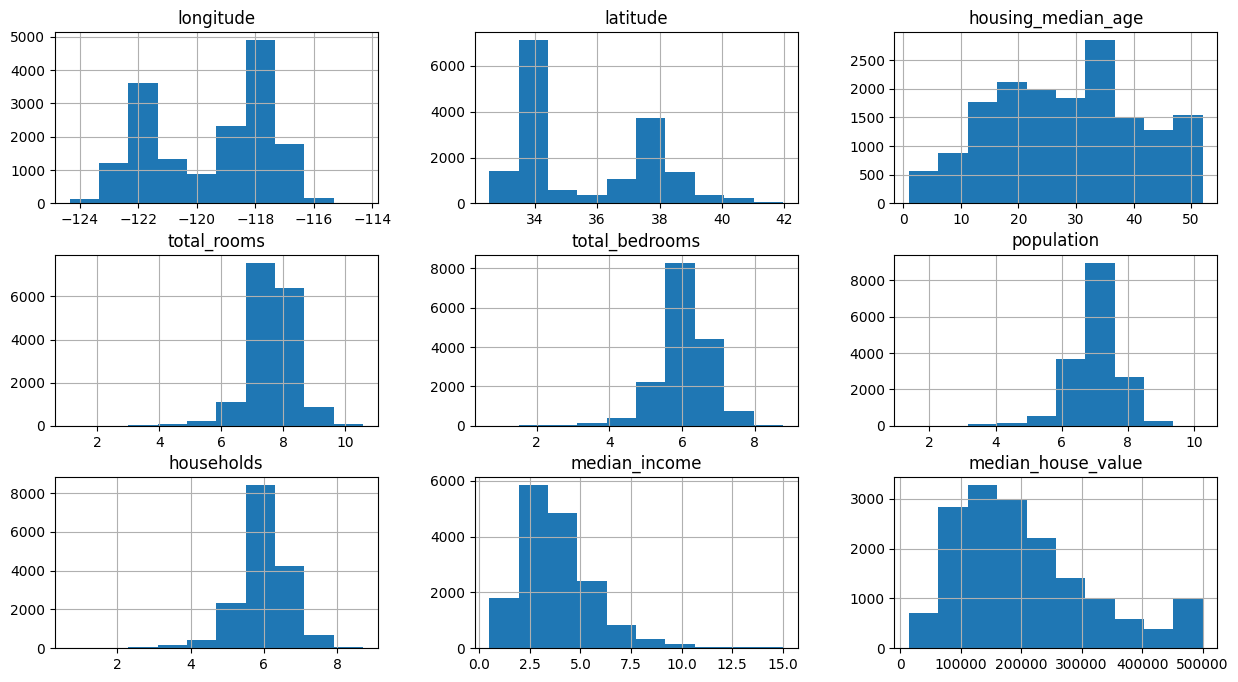

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7261
INLAND        5189
NEAR OCEAN    2104
NEAR BAY      1788
ISLAND           4
Name: ocean_proximity, dtype: int64

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [ ]:
print(train_data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20455    -118.77     34.27                 7.0     8.031060        6.678342   
16934    -122.32     37.56                 9.0     7.048386        5.662960   
19883    -119.19     36.34                33.0     7.696213        6.001415   
214      -122.22     37.79                49.0     7.510431        6.111467   
4421     -118.26     34.07                52.0     6.722630        5.303305   
...          ...       ...                 ...          ...             ...   
17106    -122.20     37.46                40.0     7.452402        5.342334   
15265    -117.28     33.04                12.0     8.402904        6.834109   
14633    -117.20     32.79                16.0     7.640123        5.978886   
16732    -120.65     35.41                15.0     8.813736        7.013915   
8414     -118.35     33.94                42.0     6.936343        5.631212   

       population  households  median_income  media

<Axes: >

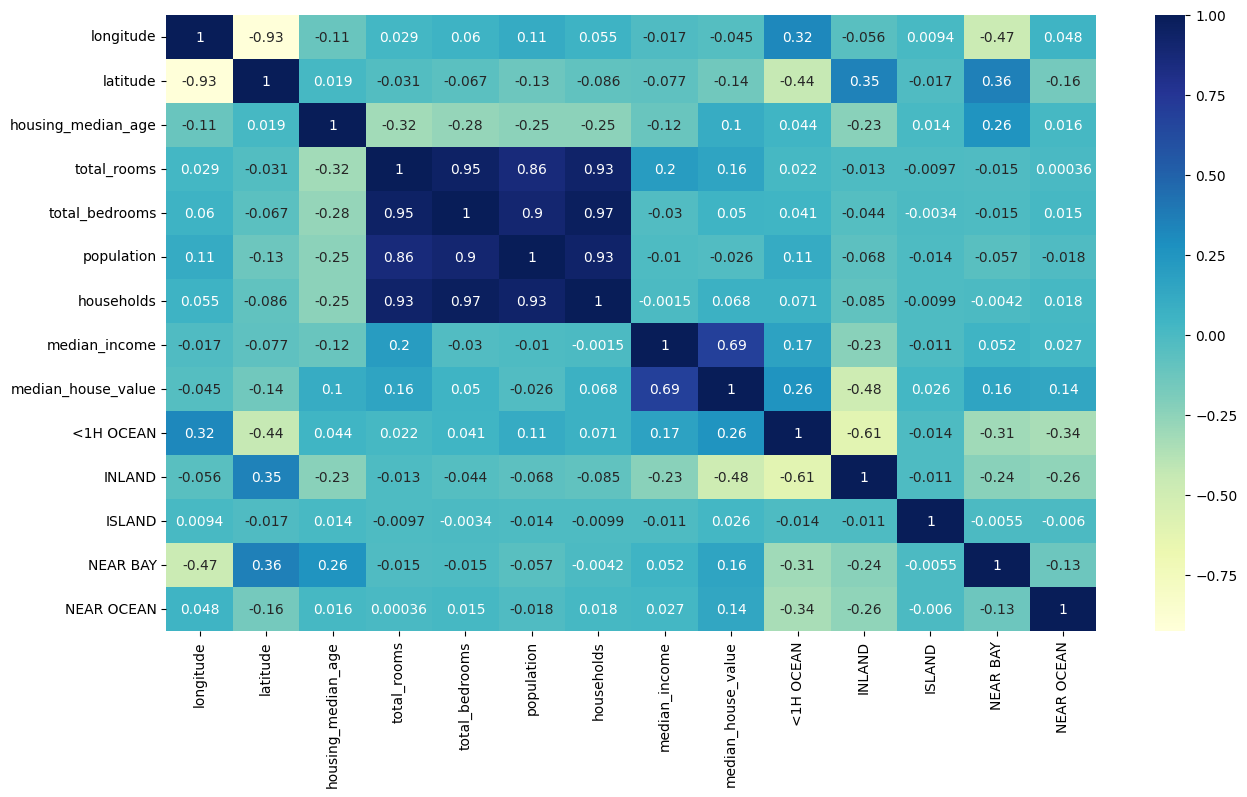

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

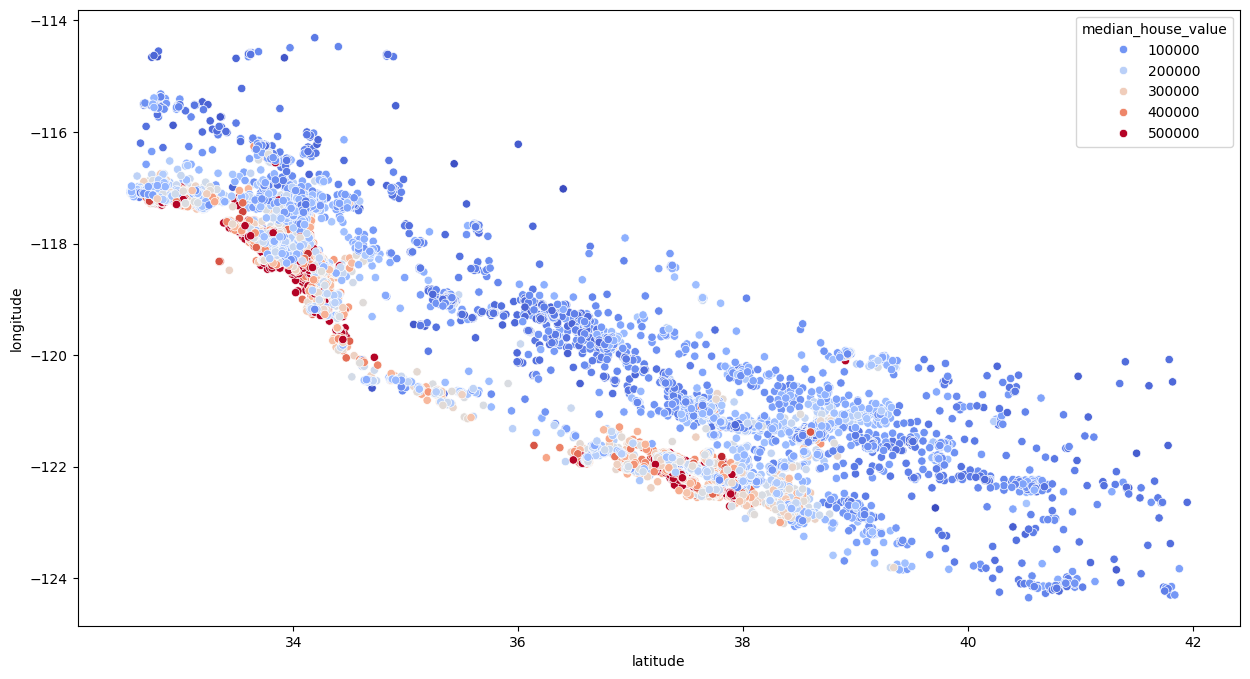

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [ ]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

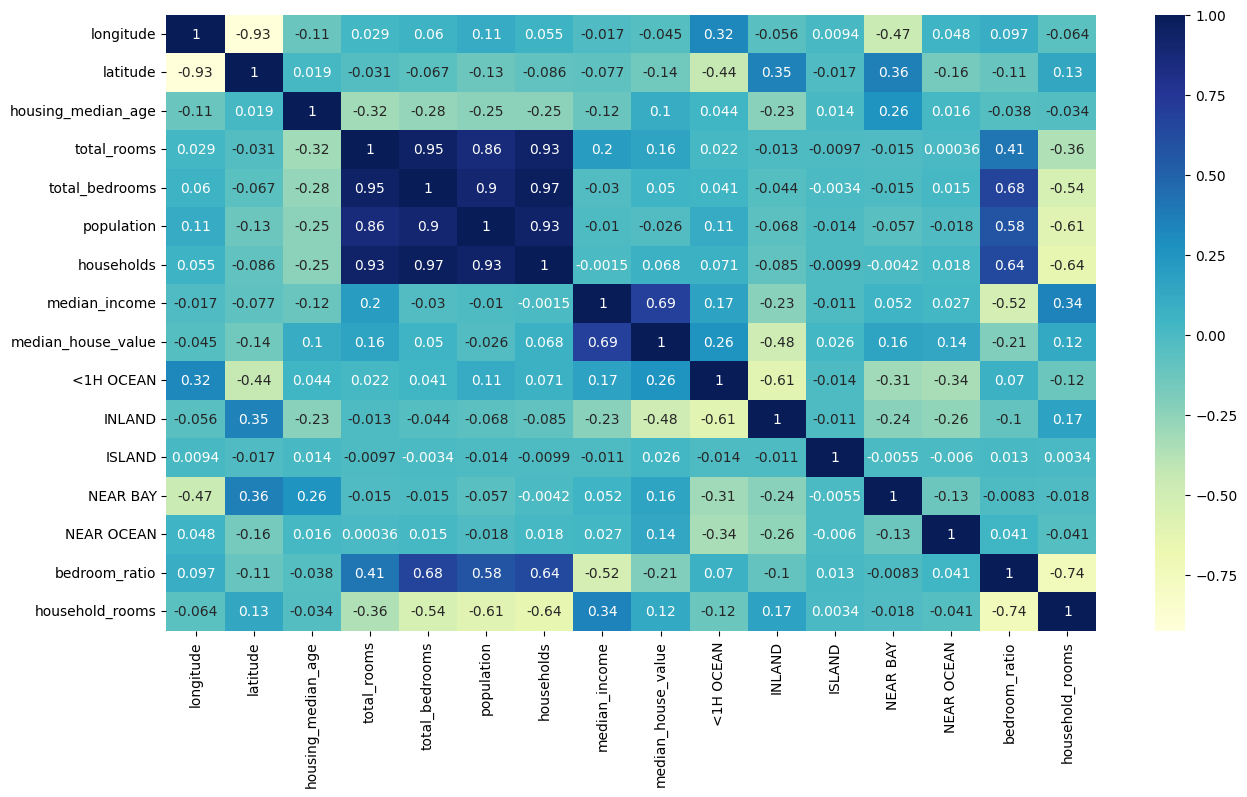

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, Y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, Y_train)

LinearRegression()

In [ ]:
test_data = X_test.join(Y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [ ]:
print(test_data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5517     -118.38     33.97                43.0     7.906915        6.129050   
17107    -122.20     37.44                31.0     7.753194        5.602119   
9781     -121.13     36.20                16.0     7.533159        6.095825   
6956     -118.06     33.98                50.0     7.044905        5.476464   
6844     -118.12     34.06                17.0     8.544419        7.387090   
...          ...       ...                 ...          ...             ...   
20293    -119.18     34.16                30.0     7.627544        5.910797   
5823     -118.34     34.21                36.0     7.514800        5.758902   
7367     -118.21     33.97                49.0     7.251345        5.749393   
12226    -116.92     33.63                18.0     5.986452        4.499810   
594      -122.08     37.71                38.0     7.416980        5.690359   

       population  households  median_income  media

In [ ]:
X_test, Y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [ ]:
X_test_s = scaler.fit_transform(X_test)

In [ ]:
reg.score(X_test_s, Y_test)

0.6804379237545135

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, Y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_test_s, Y_test)

0.7948729624166508

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}
grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(X_train_s, Y_train)

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(X_test_s, Y_test)

0.7950382707701874